In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, recall_score

In [161]:
df = pd.read_csv('/kaggle/input/bank-module4-mlz/bank+marketing/bank/bank-full.csv', sep=';')
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [160]:
df = df[[
    'age',
    'job',
    'marital',
    'education',
    'balance',
    'housing',
    'contact',
    'day',
    'month',
    'duration',
    'campaign',
    'pdays',
    'previous',
    'poutcome',
    'y',
]]

In [162]:
df.y = (df.y == 'yes').astype(int)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [163]:
print(df.describe().T)
df.isna().any()

            count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   
y         45211.0     0.116985     0.321406     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0  
y              1.0  


age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [173]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.y.values
y_val = df_val.y.values
y_test = df_test.y.values

del df_train['y']
del df_val['y']
del df_test['y']

# Question 1:  ROC AUC feature importance

In [174]:
from sklearn.metrics import roc_auc_score

In [176]:
print(df_train.dtypes)
numerical_features = list(df_train.dtypes[df_train.dtypes == 'int64'].index)
categorical_features = list(df_train.dtypes[df_train.dtypes == 'object'].index)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object


In [177]:
auc_scores = {}
for feature in numerical_features:
    score = roc_auc_score(y_train, df_train[feature])
    if score < 0.5:
        score = roc_auc_score(y_train, -df_train[feature])
    
    auc_scores[feature] = score
best_feature = max(auc_scores, key=auc_scores.get)
print("Best feature:", best_feature)
print("AUC scores:", auc_scores)

Best feature: duration
AUC scores: {'age': 0.512185717527344, 'balance': 0.5888313805382317, 'day': 0.525957882383908, 'duration': 0.8147002759670778, 'campaign': 0.5714543015682159, 'pdays': 0.5901276247352144, 'previous': 0.5985653242764153}


# Question 2: Training the model

In [169]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [126]:
y_pred = model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print("AUC:", round(auc, 3))

AUC: 0.899


# Question 3: Precision and Recall

In [127]:
import matplotlib.pyplot as plt

In [128]:
precisions = []
recalls = []

In [129]:
thresholds = np.linspace(0, 1, 101)

In [130]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds: 
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    precisions.append(p)
    
    r = tp / (tp + fn)
    recalls.append(r)

/tmp/ipykernel_30/3980283849.py:14: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


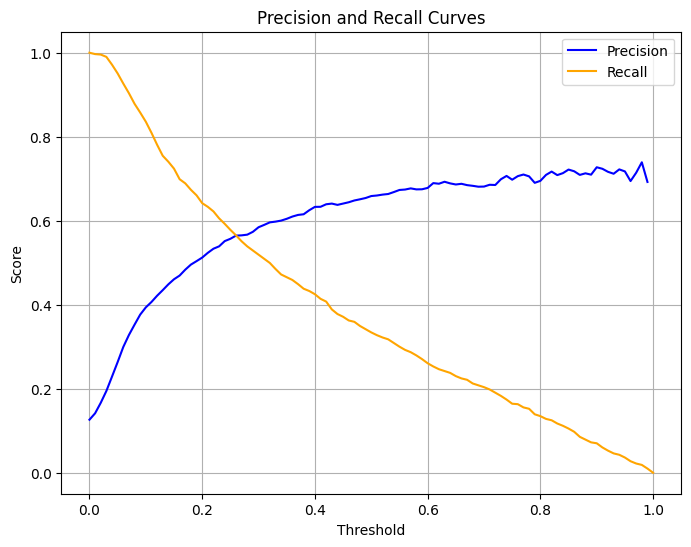

In [131]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precisions, label="Precision", color="blue")
plt.plot(thresholds, recalls, label="Recall", color="orange")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall Curves")
plt.legend()
plt.grid(True)
plt.show()

# Question 4: F1 score
**Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both**

In [132]:
f1_scores = []

In [133]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

for t in thresholds: 
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    p = tp / (tp + fp)
    precisions.append(p)
    
    r = tp / (tp + fn)
    recalls.append(r)
    
    f1 = 2 * ((p * r) / (p + r))
    f1_scores.append(f1)

/tmp/ipykernel_30/1412729782.py:14: RuntimeWarning: invalid value encountered in scalar divide
  p = tp / (tp + fp)


In [134]:
max_f1_index = np.nanargmax(f1_scores)
max_f1_threshold = thresholds[max_f1_index]

print(f"The F1 score is maximal at threshold: {max_f1_threshold:.3f}")

The F1 score is maximal at threshold: 0.220


# Question 5: 5-Fold CV

In [135]:
from sklearn.model_selection import KFold

In [136]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical_features + numerical_features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [137]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [138]:
def predict(df, dv, model):
    dicts = df[categorical_features + numerical_features].to_dict(orient = "records")

    X = dv.fit_transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [139]:
auc_scores = []

In [116]:
from tqdm.auto import tqdm


# Question 6

In [117]:
n_splits = 5

for C in [0.000001, 0.001, 1]:
    scores = []

    for train_idx, val_idx in kf.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.y.values
        y_val = df_val.y.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print(C, np.mean(scores), np.std(scores))

AttributeError: 'DataFrame' object has no attribute 'y'